# Notebook for EDA

### Notes/purpose/assumptions
- forecast estimated revenue
- the data is mainly from 2016
- we likely have to use some form of regression
- assumes the data is mostly correct and of good quality



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
stores_train = pd.read_csv('data/stores_train.csv')


In [3]:
stores_train.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [4]:
stores_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12859 entries, 0 to 12858
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             12859 non-null  object 
 1   year                 12859 non-null  int64  
 2   store_name           12859 non-null  object 
 3   plaace_hierarchy_id  12859 non-null  object 
 4   sales_channel_name   12859 non-null  object 
 5   grunnkrets_id        12859 non-null  int64  
 6   address              11085 non-null  object 
 7   lat                  12859 non-null  float64
 8   lon                  12859 non-null  float64
 9   chain_name           3737 non-null   object 
 10  mall_name            2280 non-null   object 
 11  revenue              12859 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [5]:
stores_train.describe()

,year,grunnkrets_id,lat,lon,revenue
count,12859.0,1.285900e+04,12859.000000,12859.000000,12859.000000
mean,2016.0,9.338697e+06,61.212166,9.995425,8.220683
std,0.0,5.788875e+06,2.965672,3.793565,15.377130
min,2016.0,1.010105e+06,57.994443,4.625889,0.000000
25%,2016.0,3.014208e+06,59.421935,7.284691,1.195000
50%,2016.0,9.065213e+06,59.939017,10.407916,3.374000
75%,2016.0,1.449011e+07,62.116531,10.848180,7.996000
max,2016.0,2.030031e+07,71.098287,31.118935,219.599000


In [9]:
report = ProfileReport(stores_train)
report

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


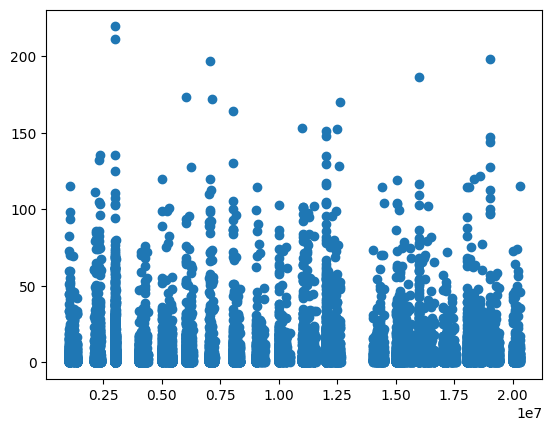

In [13]:
plt.scatter(stores_train['grunnkrets_id'],stores_train['revenue'])
plt.show()

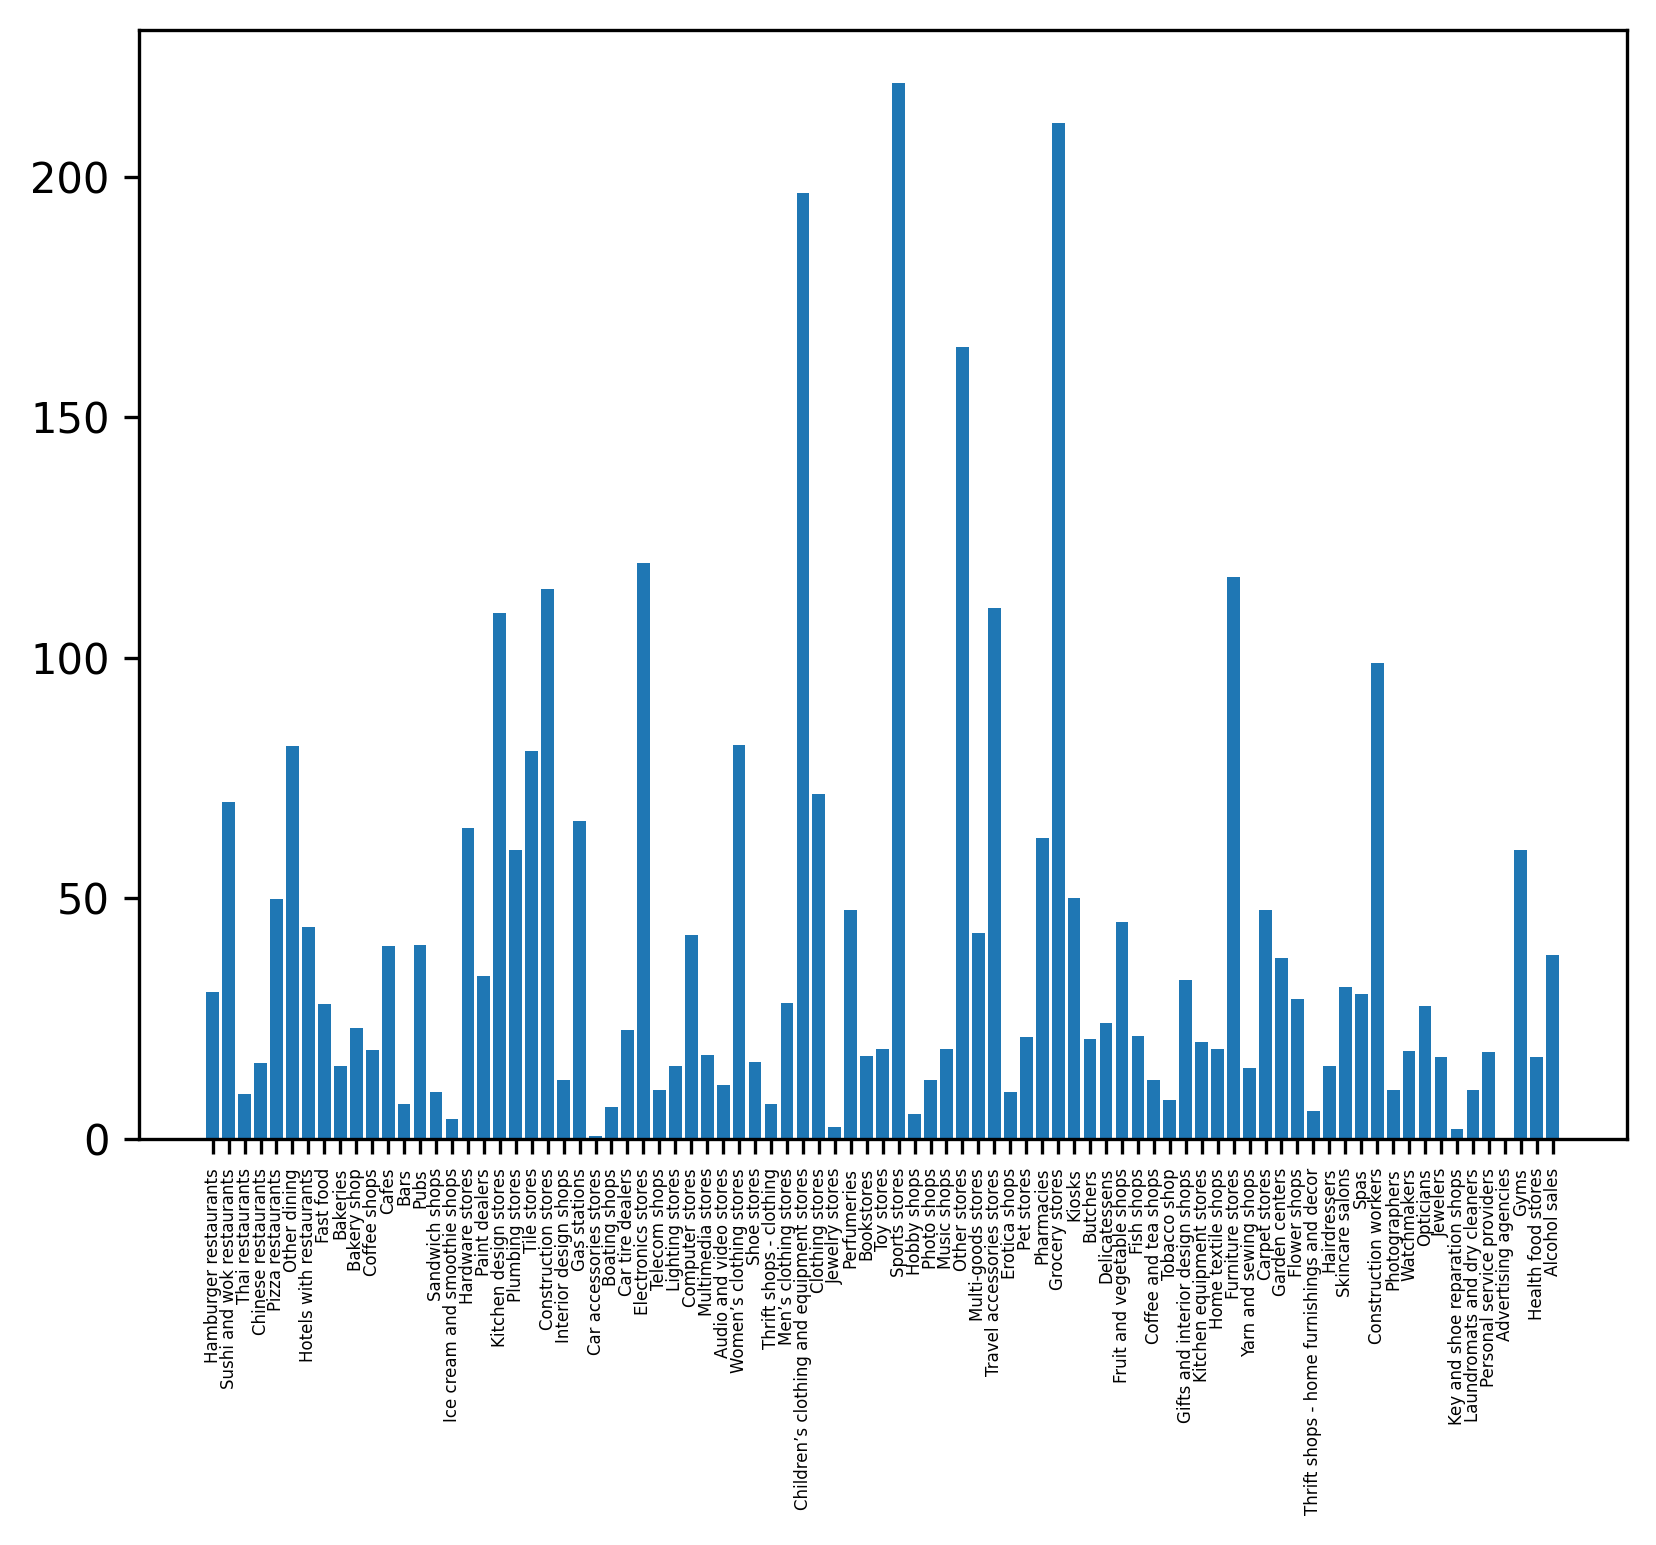

<Figure size 25600x25600 with 0 Axes>

In [23]:
plaace_hierarchy = pd.read_csv('data/plaace_hierarchy.csv')
stores_with_hierarchy = stores_train.merge(plaace_hierarchy, how='left', on='plaace_hierarchy_id')

plt.bar(stores_with_hierarchy['lv3_desc'],stores_with_hierarchy['revenue'])
plt.rcParams['figure.dpi'] = 800
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(32,32))
plt.show()